In [1]:
import torch
import os
import numpy as np
from models import SAVi
from data import gestalt
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
dl = DataLoader(gestalt.Gestalt(root_dir="/om/user/yyf/CommonFate/scenes", sub_level=["superquadric_2"]))

In [3]:
batch = next(iter(dl))

images = batch['images']
flows = batch['flows']
masks = batch['masks']

In [4]:
batch_info = dl.dataset.get_info(0)

In [5]:
batch_info[-1]

'/om/user/yyf/CommonFate/scenes/voronoi/superquadric_2/scene_001'

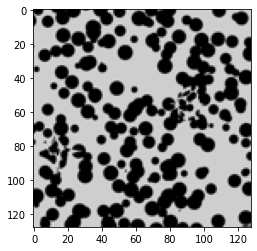

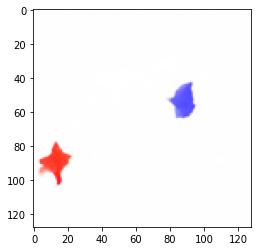

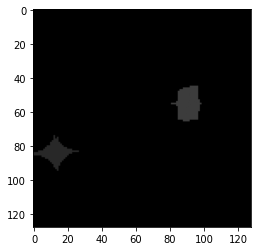

In [6]:
plt.imshow(images[0][0].cpu().numpy().transpose(2, 1, 0))
plt.show()
plt.imshow(flows[0][0].cpu().numpy().transpose(2, 1, 0))
plt.show()
plt.imshow(masks[0][0].cpu().numpy().transpose(2, 1, 0), cmap="gray")
plt.show()

In [8]:
from torch.nn import functional as F
model = SAVi.SlotAttentionVideo().float().to(device)
out = model(images, cues=masks[:, 0])
torch.autograd.set_detect_anomaly(True)
optim = torch.optim.Adam(model.parameters(), lr=0.0002)

losses = []
for i in range(1000):
    optim.zero_grad()
    out = model(images, cues=masks[:, 0])
    recons_combined = out['recon_combined']

    loss = F.mse_loss(recons_combined, flows)
    loss.backward()
    if i % 10 == 0:
        print(loss.item())
    
    losses.append(loss.item())
    optim.step()
    

0.9750066995620728
0.4899665415287018
0.18034595251083374
0.1020519807934761
0.06307503581047058
0.04582937806844711
0.03774968162178993
0.031919654458761215
0.026607336476445198
0.021936003118753433
0.01772313565015793
0.013864315114915371
0.011007830500602722
0.009270980022847652
0.008198991417884827
0.007390581537038088
0.006943374406546354
0.006765591446310282
0.006640298292040825
0.006543152034282684
0.006463500205427408
0.006392713636159897
0.006329454481601715
0.006271803751587868
0.006219182629138231
0.0061696735210716724
0.006123332306742668
0.006079513113945723
0.00603802315890789
0.0059983697719872
0.005960892885923386
0.005924793425947428
0.00588797964155674
0.005851214751601219
0.005816236138343811
0.005782383028417826
0.005750552751123905
0.00571994436904788
0.005691083148121834
0.005662810057401657
0.005636205431073904
0.005607898347079754
0.005580168683081865
0.00555194728076458
0.005521155893802643
0.005489231552928686
0.005455347243696451
0.005419077817350626
0.005388

In [9]:
recons = (recons_combined - recons_combined.min()) / recons_combined.max()

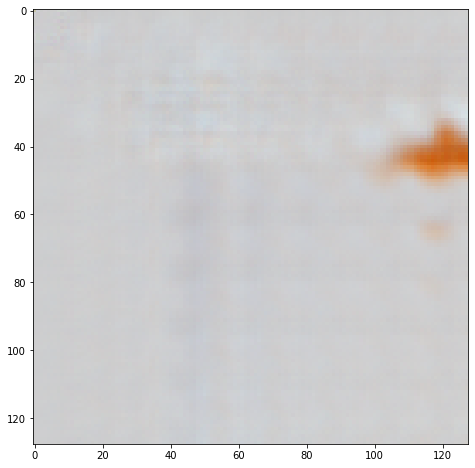

In [17]:
import sys
sys.path.append("../")
from utils import make_video
from matplotlib import animation
from IPython.display import HTML
from matplotlib import animation, rc

fig1, ani1 = make_video(recons.squeeze().detach().cpu().numpy().transpose(0, 2, 3, 1), 
                        output_dir="figures", output_name="overfit_0", format="mp4")
HTML(ani1.to_jshtml())
plt.show()


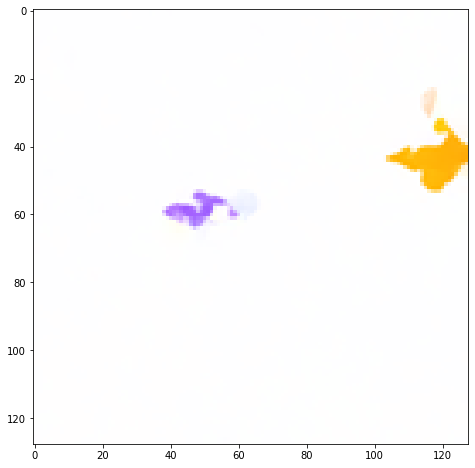

In [18]:
fig2, ani2 = make_video(flows.squeeze().detach().cpu().numpy().transpose(0, 2, 3, 1),
                       output_dir="figures", output_name="overfit_0_flows", format="mp4")
HTML(ani2.to_jshtml())
plt.show()


<IPython.core.display.Javascript object>


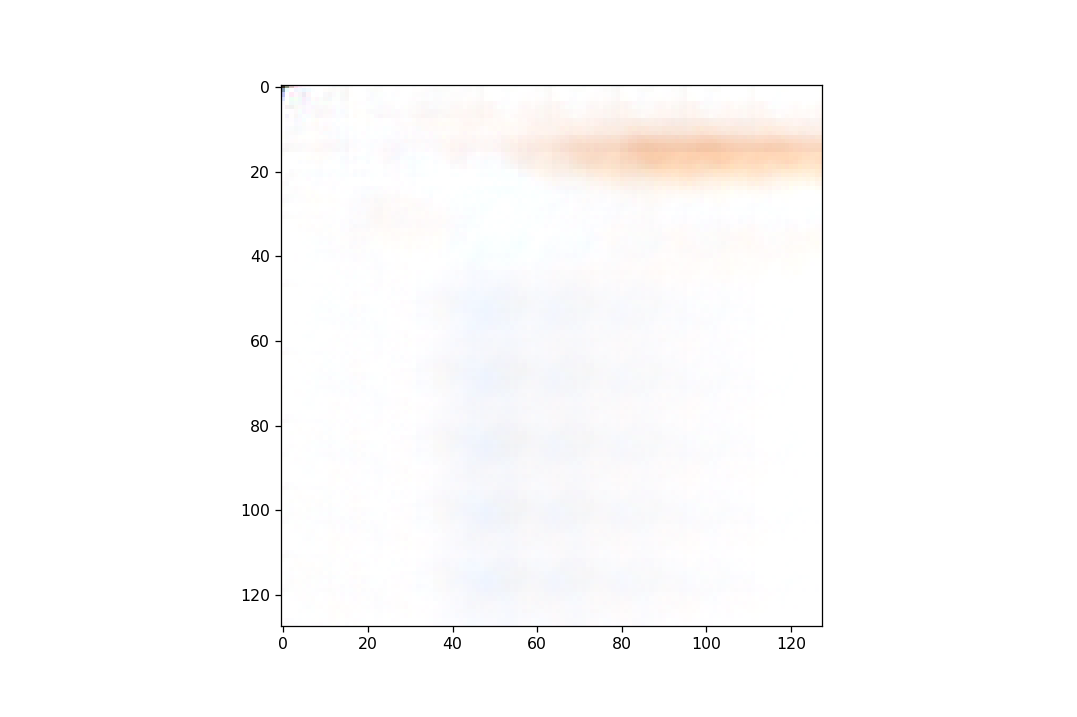

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [477]:
plt.imshow(recons_combined[0, 1].permute(1, 2, 0).detach().cpu().numpy())
plt.show()
